In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from functions import load_dataset
from functions import remove_unwanted_cols
from functions import preprocess_tweet_text
from functions import get_feature_vector
from functions import int_to_string
from functions import load_model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from wordcloud import WordCloud
from pandas import option_context

In [2]:
# Load training dataset
#dataset = load_dataset("merged_labeled_training.csv", ["label", "text"])

In [3]:
# Remove unwanted columns from dataset
#dataset = remove_unwanted_cols(dataset, ["id", "NEG", "NEU", "POS"])

In [4]:
# Preprocess data
#dataset.text = dataset["text"].apply(preprocess_tweet_text)
#with option_context('display.max_colwidth', 500):
#    display(dataset.head(5))

# Load saved cleaned dataset
dataset = load_dataset("cleaned_merge_dataset.csv", ["label", "text"])
display(dataset.groupby('label').count())

,label,text
0,0.0,incredible india atulya bharat land seekers beproud plz
1,0.0,near western union want make 300 today hit let walk process
2,1.0,firstdayofschool students teachers good luck successful 2016 17 school year educationmatters ht
3,0.0,kate wrights figure want life
4,1.0,josh jenkins looking forward tab breeders crown super sunday


Data has 2357776 rows, 2 columns.


,text
label,
-1.0,821191
0.0,460857
1.0,1067747


In [5]:
# Undersampling
min_count_type = dataset.label.value_counts().min()
sentiment_types = list(dataset.label.unique())
subdatasets = list()
for sentiment_type in sentiment_types :
    dataset_sentiment_type = dataset[dataset['label']==sentiment_type]
    dataset_sentiment_type = dataset_sentiment_type.sample(min_count_type)
    subdatasets.append(dataset_sentiment_type)
dataset_undersampled = pd.concat(subdatasets)
dataset_undersampled.sample(frac=1)
display(dataset_undersampled.groupby('label').count())

dataset = pd.DataFrame(dataset_undersampled)
display(dataset['text'].size)

,text
label,
-1.0,458700
0.0,460857
1.0,459111


1382574

In [6]:
#dataset.to_csv("cleaned_merge_dataset.csv", index=False)

In [7]:
# TFIDF matrix, weighting factor
tf_vector = get_feature_vector(np.array(dataset['text'].values.astype('U')).ravel())

In [8]:
# print idf values 
df_idf = pd.DataFrame(tf_vector.idf_, index=tf_vector.get_feature_names(),columns=["idf_weights"]) 

# sort ascending 
display(df_idf.sort_values(by=['idf_weights'])[0:10])
display(df_idf.sort_values(by=['idf_weights'])[1100:1110])

,idf_weights
new,4.127788
day,4.213376
get,4.275816
good,4.304319
today,4.342580
love,4.389845
like,4.393865
go,4.482952
got,4.574134
one,4.609364


,idf_weights
brothers,7.882456
liked,7.885280
lake,7.885280
asked,7.886696
blessed,7.888823
ideas,7.888823
sadly,7.889533
china,7.889533
university,7.889533
smartphone,7.890954


In [9]:
X = tf_vector.transform(np.array(dataset['text'].values.astype('U')).ravel())
y = np.array(dataset.iloc[:, 0]).ravel()
display(dataset.head(5))
print(X[0:5])

,label,text
360230,0.0,want work phoenix az view latest opening job f...
177479,0.0,mars venus earth
1517,0.0,brownies bomb
292712,0.0,hassan aman twitter matte black acura nsx sigh...
289897,0.0,tips fit workout 10


  (0, 393590)	0.1863681359375416
  (0, 384061)	0.19900331896555
  (0, 379734)	0.2897220165307443
  (0, 277425)	0.3603957394762402
  (0, 265908)	0.3060627920051177
  (0, 211656)	0.2771011276578447
  (0, 195604)	0.3096159863978573
  (0, 195550)	0.25251155514008805
  (0, 173437)	0.3194483211949708
  (0, 139949)	0.3680785217261145
  (0, 51439)	0.379773644254873
  (1, 378574)	0.6593526711187568
  (1, 229286)	0.5635484053081756
  (1, 122505)	0.497661782703045
  (2, 72819)	0.7346835090847935
  (2, 67713)	0.6784100098604487
  (3, 369269)	0.14429355019600965
  (3, 343273)	0.3905157430614324
  (3, 334575)	0.37955512431920513
  (3, 323937)	0.31917618596919356
  (3, 259727)	0.3444326313043041
  (3, 230570)	0.24776775696211084
  (3, 168371)	0.32117948837991506
  (3, 93709)	0.26201568547421117
  (3, 64429)	0.15341459237008204
  (3, 39291)	0.33604845754389684
  (3, 32145)	0.3040485333770623
  (4, 393760)	0.5654985595861013
  (4, 359277)	0.5031343846352143
  (4, 140940)	0.5198797988063167
  (4, 2285)	

In [10]:
# Split dataset into Train, Validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.01, random_state=34)

In [11]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(1368748, 403541)
(13826, 403541)
(1368748,)
(13826,)


In [12]:
# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
print("Naive Bayes training accuracy: " + str(NB_model.score(X_train, y_train)) + "%")
print("Naive Bayes test accuracy: " + str(NB_model.score(X_valid, y_valid)) + "%")

# Training LinearSVC model
LSVC_model = LinearSVC()
LSVC_model.fit(X_train, y_train)
print("LinearSVC training accuracy: " + str(LSVC_model.score(X_train, y_train)) + "%")
print("LinearSVC test accuracy: " + str(LSVC_model.score(X_valid, y_valid)) + "%")

# Saving LSVC model to later use
#file = open('LSVC_model.pickle','wb')
#pickle.dump(LSVC_model, file)
#file.close()

# Training Naive BernoulliNB model
BNB_model = BernoulliNB()
BNB_model.fit(X_train, y_train)
print("BernoulliNB training accuracy: " + str(BNB_model.score(X_train, y_train)) + "%")
print("BernoulliNB test accuracy: " + str(BNB_model.score(X_valid, y_valid)) + "%")

# Training Logistics Regression model
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)
print("Logistic Regression training accuracy: " + str(LR_model.score(X_train, y_train)) + "%")
print("Logistic Regression test accuracy: " + str(LR_model.score(X_valid, y_valid)) + "%")

Naive Bayes training accuracy: 0.8181337981863718%
Naive Bayes test accuracy: 0.7850426732243599%
LinearSVC training accuracy: 0.866339165427091%
LinearSVC test accuracy: 0.8047880804281788%
BernoulliNB training accuracy: 0.8127639273262866%
BernoulliNB test accuracy: 0.7841024157384637%


c:\users\mccak\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression training accuracy: 0.8149133368596703%
Logistic Regression test accuracy: 0.8009547229856792%


In [13]:
# Load not labeled test dataset

not_labeled_test_ds = load_dataset("not_labeled_test.csv", ["date", "user", "text"])
original = not_labeled_test_ds

,date,user,text
0,2020-12-25 23:59:53+00:00,KennaStevens1,"@TheRickyDavila @doxiedachsie When they were informed of COVID19 early this year they invested in a company that makes body bags. Why would they care about the nations virus death toll? These two are despicable and must be voted out! Let's go, Georgia!"
1,2020-12-25 23:59:52+00:00,JenMangler,Short but important thread. #COVID19 #COVID #edchat #iaedchat https://t.co/85Z2nVUMQB
2,2020-12-25 23:59:51+00:00,COEmergency,"COVID-19 vaccine administered: 63,170 doses #COVID19Colorado https://t.co/IArtRHVaF4 https://t.co/fmWZptXtYA"
3,2020-12-25 23:59:51+00:00,AntiTotalitaBot,@CTVNews inaccurate counting: How COVID-19 Deaths Are Counted https://t.co/gjMyeBNYV2
4,2020-12-25 23:59:46+00:00,TestUse05632971,Some Passengers Infected After Man Died of COVID-19 on Plane https://t.co/GWXB2OhSHo


Data has 15146 rows, 3 columns.


In [14]:
not_labeled_test_ds = remove_unwanted_cols(not_labeled_test_ds, ["date", "user"])


,text
0,"@TheRickyDavila @doxiedachsie When they were informed of COVID19 early this year they invested in a company that makes body bags. Why would they care about the nations virus death toll? These two are despicable and must be voted out! Let's go, Georgia!"
1,Short but important thread. #COVID19 #COVID #edchat #iaedchat https://t.co/85Z2nVUMQB
2,"COVID-19 vaccine administered: 63,170 doses #COVID19Colorado https://t.co/IArtRHVaF4 https://t.co/fmWZptXtYA"
3,@CTVNews inaccurate counting: How COVID-19 Deaths Are Counted https://t.co/gjMyeBNYV2
4,Some Passengers Infected After Man Died of COVID-19 on Plane https://t.co/GWXB2OhSHo


In [15]:
with option_context('display.max_colwidth', 500):
    display(not_labeled_test_ds[500:550])

,text
500,i would feel bad for the medical personnel and med workers since the riots would super spread covid and it would just end up with a shit ton of new infections :/ everyone pls stay safe and stay inside!!
501,@tozani76 @milksugarcocoa I hope they all get covid and die.
502,"If you donât take covid seriously because thereâs a â99%â survival rate, you are NOT intelligent Iâm sorry. Fuck your data."
503,@Timcast @willchamberlain It was probably COVID
504,Nurse in 'perfect health' found dead after getting a COVID-19 vaccine https://t.co/ZLioRJdGTb
505,@clfunez @CNN I just donât want any of them to die because of this . Can you imagine if someone like Nancy comes down covid 19 after this. When someone should go it and just wipe things down
506,"Letâs not forget that just yesterday, US reached a record peak in covid deaths."
507,âMore than 100 doctors urge Quebec to keep schools openâ.Who are these doctors?They mentioned schools are not playing role in transmitting COVID since the cases have gone up although the schools were closed.I would like to know where they got their medical degrees?@CovidEcoles
508,iâd never say this about anyone but this man deserves covid https://t.co/QHFsWWygcy
509,@Lena_Clare Huge increase in the number of deaths from Covid - 1041 announced today.


In [16]:
# Creating not labeled test data
not_labeled_test_ds.text = not_labeled_test_ds["text"].apply(preprocess_tweet_text)
with option_context('display.max_colwidth', 500):
    display(not_labeled_test_ds.head(5))

,text
0,informed covid19 early year invested company makes body bags would care nations virus death toll two despicable must voted let go georgia
1,short important thread covid19 covid edchat iaedchat
2,covid 19 vaccine administered 63 170 doses covid19colorado
3,inaccurate counting covid 19 deaths counted
4,passengers infected man died covid 19 plane


In [17]:
not_labeled_test_feature = tf_vector.transform(np.array(not_labeled_test_ds.iloc[:, 0]).ravel())
print(not_labeled_test_feature[0])

  (0, 398435)	0.15498758867815285
  (0, 394312)	0.1467933640869743
  (0, 381854)	0.22876610900936878
  (0, 380529)	0.2502944878775117
  (0, 369780)	0.16082821555606638
  (0, 360871)	0.2695348719140377
  (0, 251245)	0.2695348719140377
  (0, 247278)	0.1734632788431424
  (0, 226247)	0.1710787907422606
  (0, 214512)	0.15907450564492606
  (0, 187888)	0.3147546858478078
  (0, 185438)	0.27269315598772054
  (0, 157183)	0.12020777217512679
  (0, 153539)	0.23603750717467017
  (0, 122392)	0.16582412032984317
  (0, 110941)	0.3156637363756173
  (0, 107809)	0.20960694116541098
  (0, 94544)	0.20264273261317903
  (0, 79985)	0.189986976739904
  (0, 67137)	0.19137717987782266
  (0, 53390)	0.2348765283351453


In [18]:
# Predict
test_prediction_lsvc = LSVC_model.predict(not_labeled_test_feature)

# Transform the integer labels to string labels
test_results = []
for test in test_prediction_lsvc:
    test_results.append(int_to_string(test))

not_labeled_test_ds['sentiment'] = test_results

with option_context('display.max_colwidth', 500):
    display(not_labeled_test_ds[550:570])

,text,sentiment
550,covid outbreak gon na fucking funny fucking scary,Negative
551,anyone tell wrong sentence covid 19 toronto nowonder,Negative
552,forgot glad hear still covid free,Positive
553,covid ah,Positive
554,someone town fb group defending ellie martin covid coach trying get wife respond save bund meeting adolph,Neutral
555,incursion violent pro trump supporters capitol hill social distancing rules covid 19 seems gone thine air noticed large chunk protesters putting face mask unprecedented surge virus way,Neutral
556,covid lockdown london,Neutral
557,stupid bitch thing spreading covid even go fuck home,Negative
558,surprised whole senate diagnosed w covid,Negative
559,republicans could called emergency sessions like point last year direct covid relief stimulus checks many receipts get first congress,Neutral


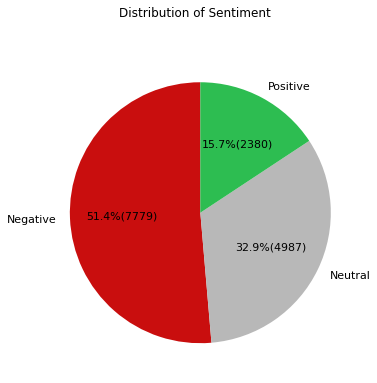

In [19]:
sentiments = not_labeled_test_ds.groupby('sentiment').size()

graph = not_labeled_test_ds.groupby('sentiment').count().rename(columns={'text': ''}).plot(
    autopct= lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*sentiments.sum()),
    startangle=90, 
    legend = False,
    shadow=False,
    figsize=(6, 6), 
    fontsize=11,
    kind='pie', 
    colors = ['#c90e0e', '#b8b8b8', '#2dbd51'],
    title='Distribution of Sentiment',
    subplots=True)

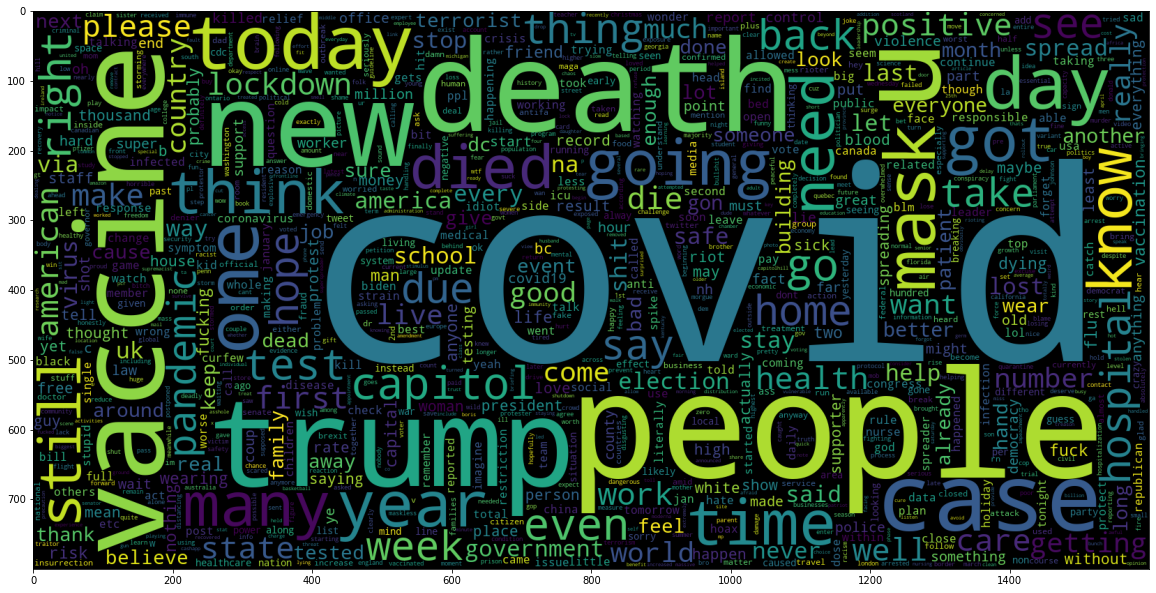

In [20]:
# Word Cloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(list(not_labeled_test_ds['text'])))
plt.imshow(wc)
plt.show()